<a href="https://colab.research.google.com/github/Alankaar63/Data-Analysis-With-Python/blob/main/RidgeRegularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.4526027629719195

In [12]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001) #alpha is the lambda
R.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [13]:
y_preds1 = R.predict(X_test)
r2_score(y_test, y_preds1) #slightly better than LR

0.4526998154220112

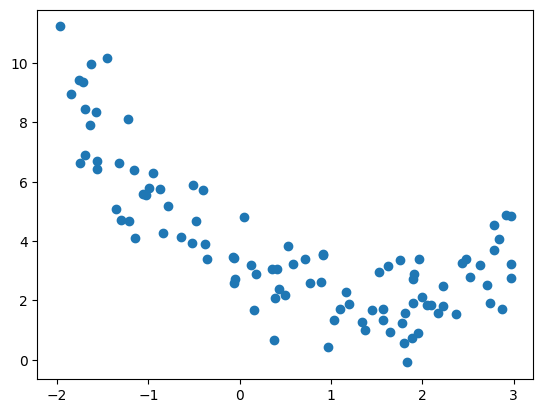

In [14]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()


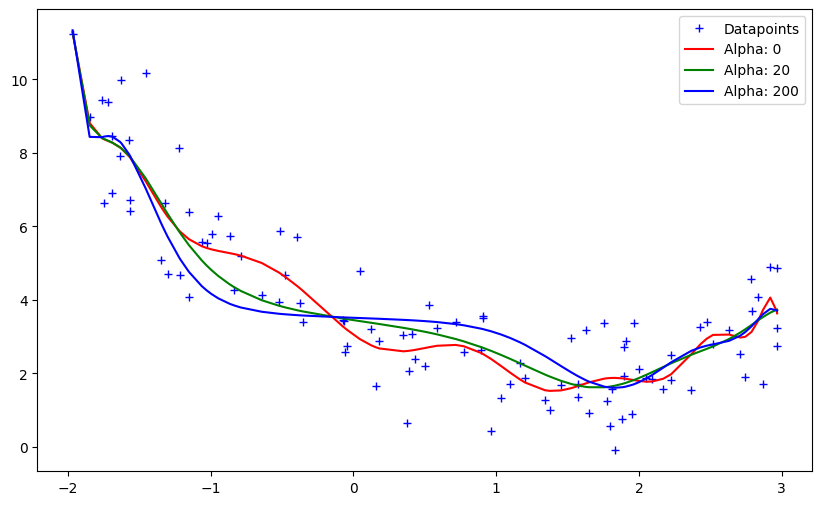

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()